Lets Grow More VIP

Data Science Internship


Name:- Hegde Dhanika Dhananjaya

BeginnerLevelTask 2-Stock Market Prediction And Forecasting Using Stacked  3LSTM

IMPORTING THE MODULES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

LOADING THE DATASET

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.shape

(2035, 8)

In [5]:
data.dtypes


Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [10]:
data['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

In [11]:
df = data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
df.reset_index(inplace=True)

In [13]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

DATA VISUALISATION

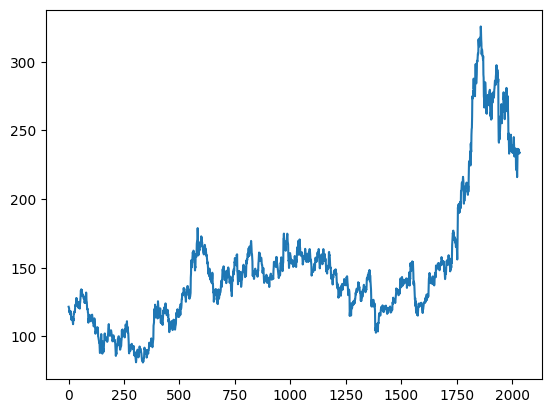

In [14]:
plt.plot(df['Close'])


<Axes: >

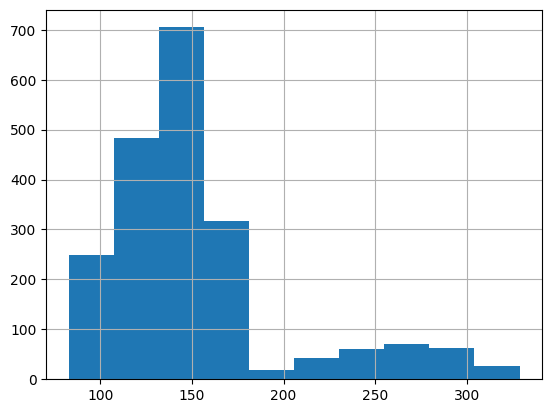

In [15]:
df['High'].hist()


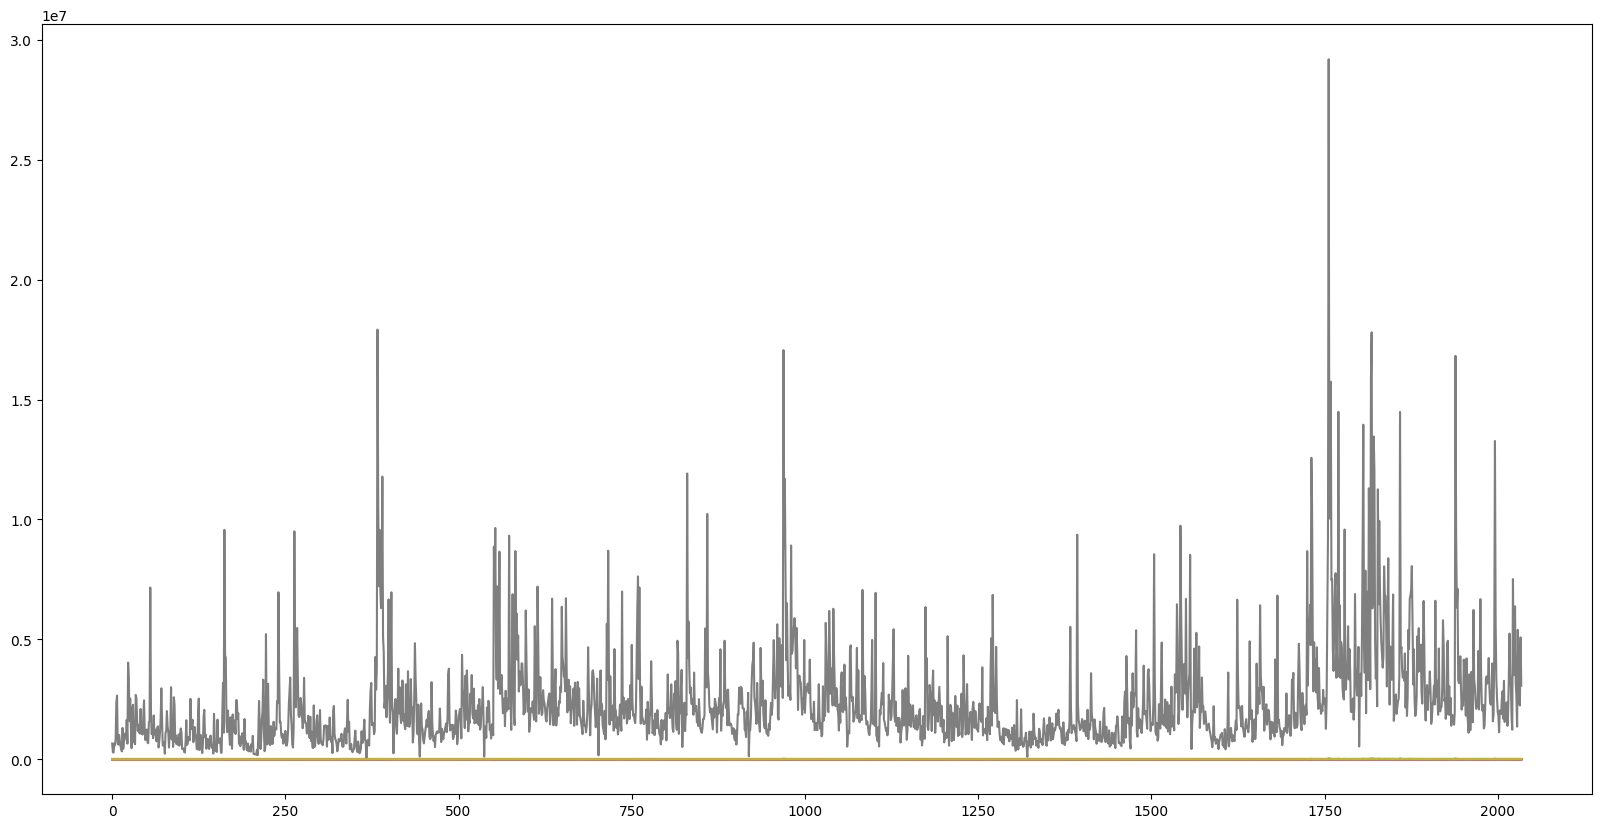

In [120]:
plt.figure(figsize=(20,10))
plt.plot(df)


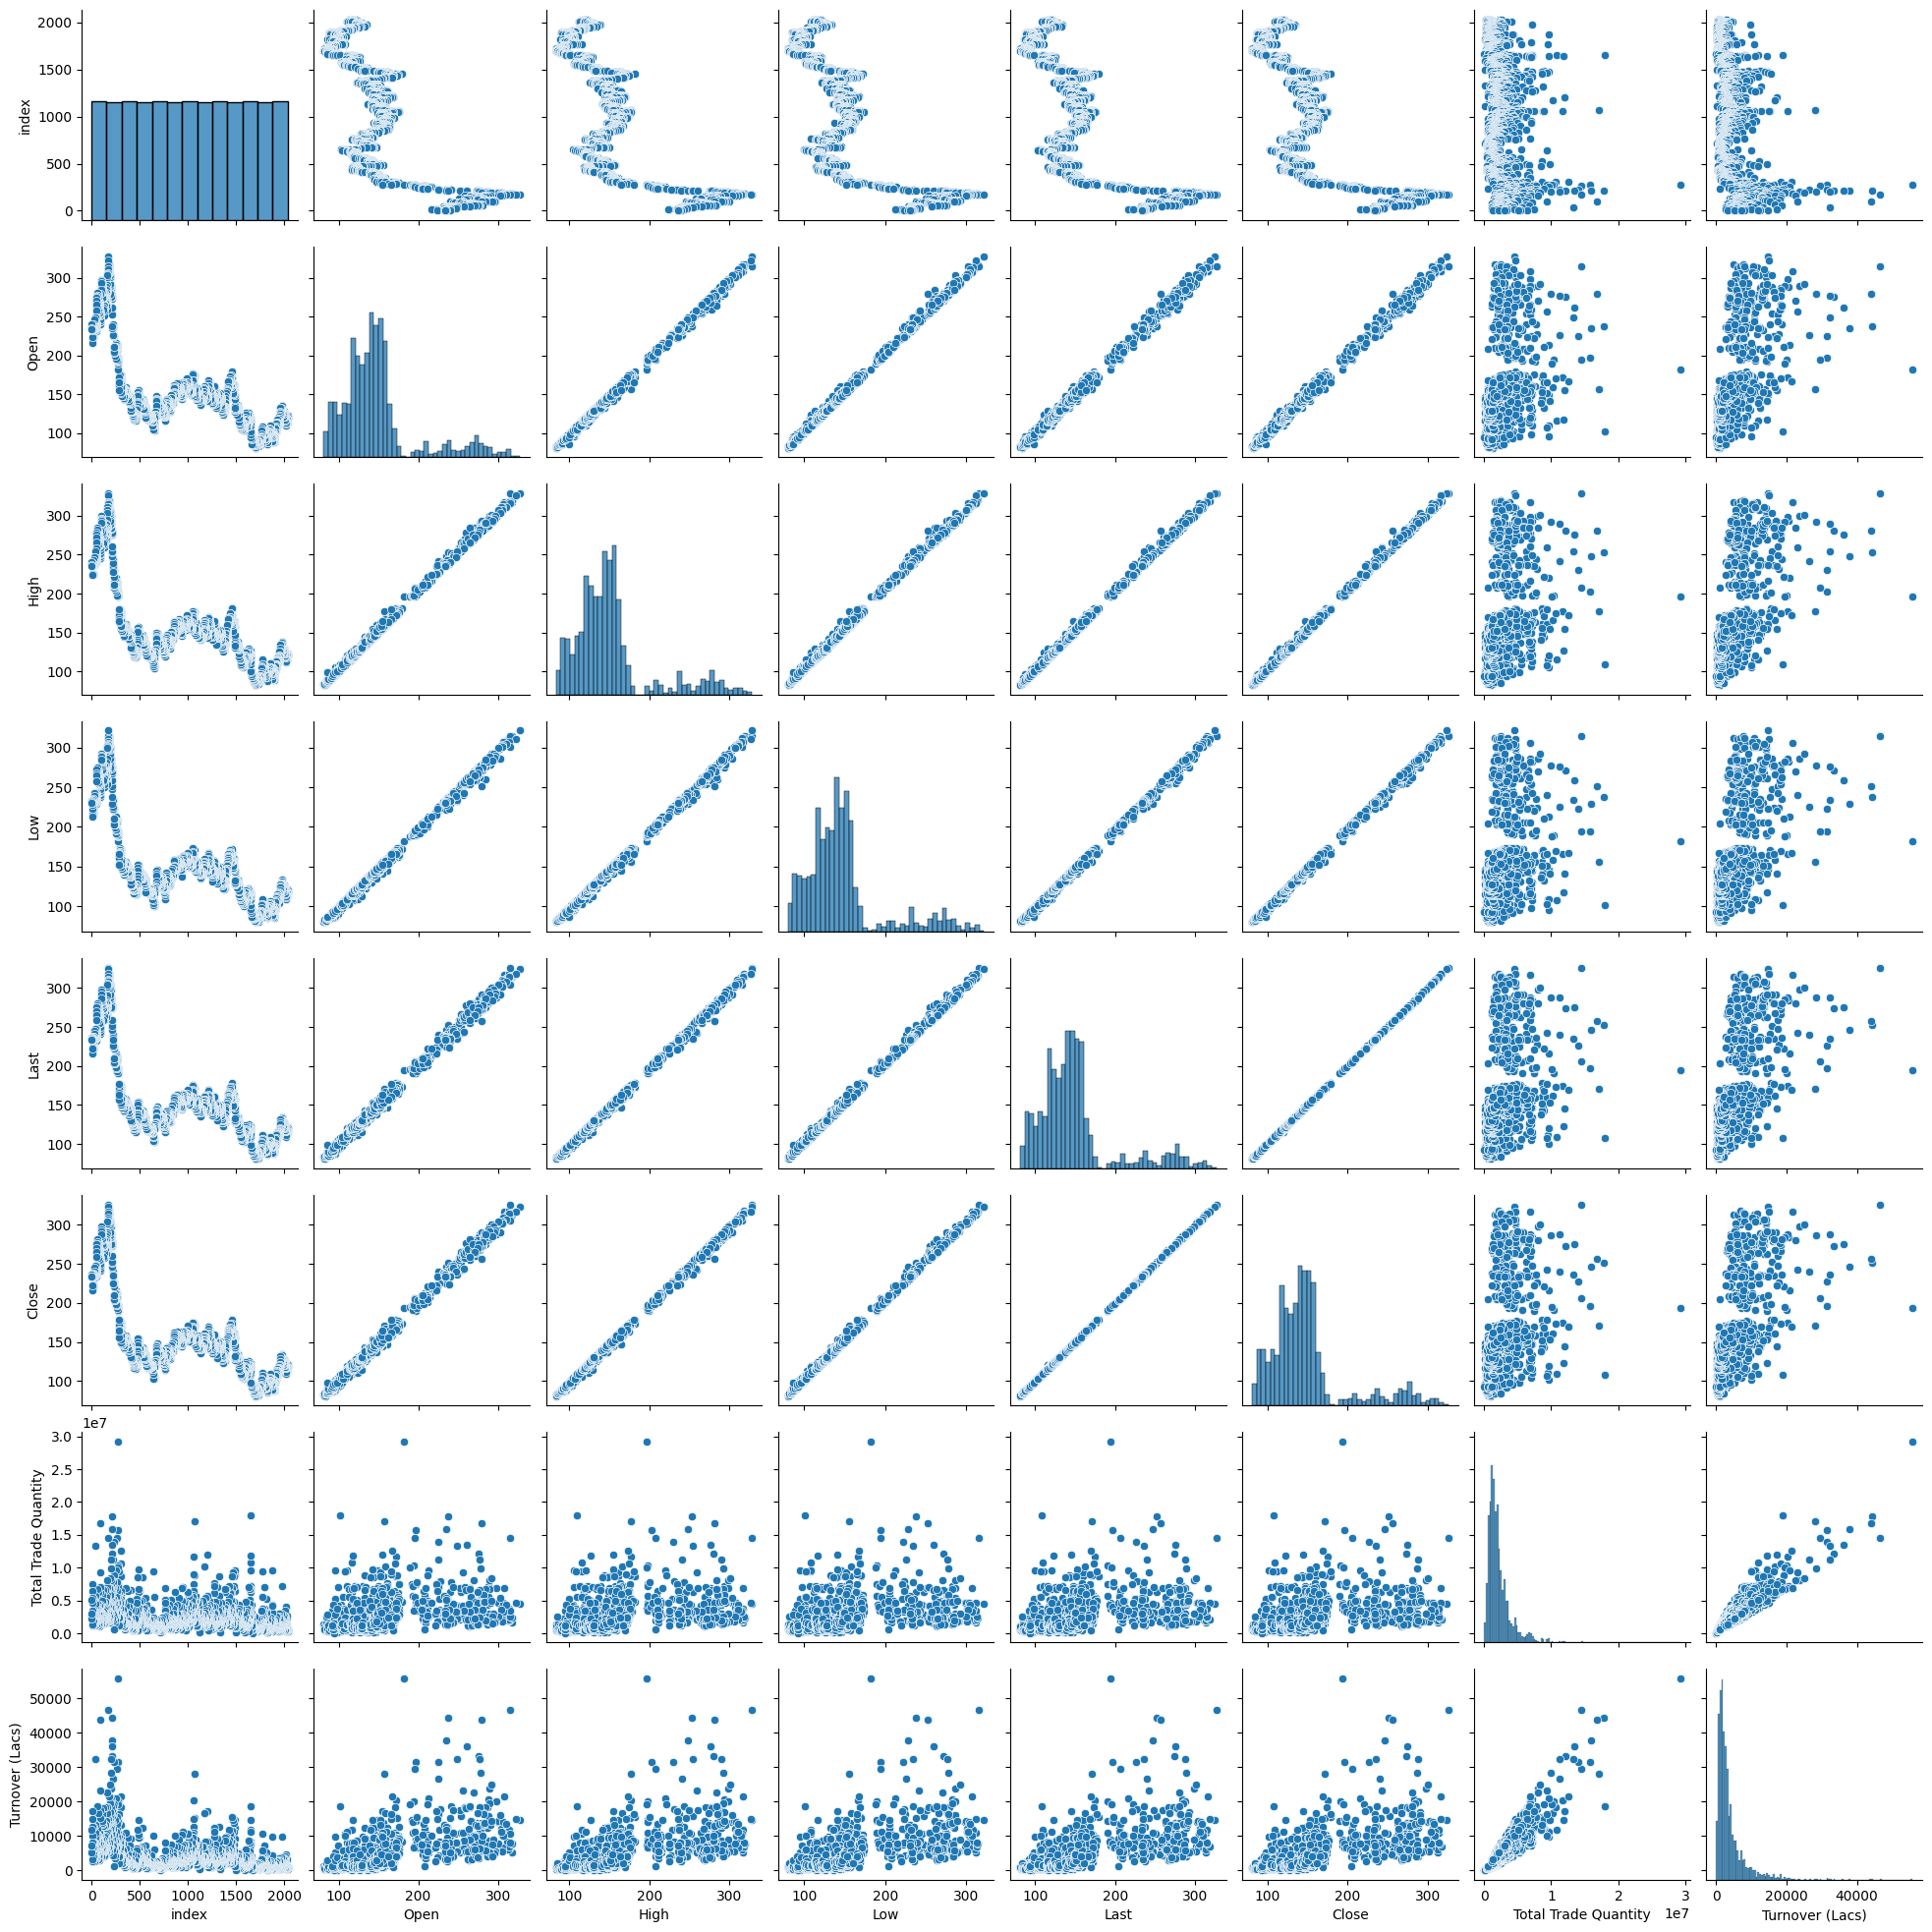

In [17]:
sns.pairplot(df)


Applying MinMaxScalar

In [18]:
scalar = MinMaxScaler()
df_close=scalar.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Splitting the data

In [121]:
# Splitting the data into train and test sets
train_size = int(len(df_close) * 0.67)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]


In [122]:
time_step=100
X_train, y_train = create_matrix(train, time_step)
X_test, y_test = create_matrix(test, time_step)

In [123]:
X_train.shape

(1262, 100)

In [124]:
y_train.shape

(1262,)

In [125]:
X_test.shape

(571, 100)

In [126]:
y_test.shape

(571,)

In [127]:
X_train  = X_train.reshape(X_train.shape + (1,))
X_test =  X_test.reshape(X_test.shape + (1,))

In [128]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [129]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
18/18 [==============================] - 4s 202ms/step - loss: 3.9754e-04 - val_loss: 2.6826e-04
Epoch 2/60
18/18 [==============================] - 4s 241ms/step - loss: 3.8694e-04 - val_loss: 2.6248e-04
Epoch 3/60
18/18 [==============================] - 4s 225ms/step - loss: 4.0734e-04 - val_loss: 2.6886e-04
Epoch 4/60
18/18 [==============================] - 4s 204ms/step - loss: 3.7008e-04 - val_loss: 3.4194e-04
Epoch 5/60
18/18 [==============================] - 4s 221ms/step - loss: 3.6919e-04 - val_loss: 2.4608e-04
Epoch 6/60
18/18 [==============================] - 5s 254ms/step - loss: 3.3897e-04 - val_loss: 2.3632e-04
Epoch 7/60
18/18 [==============================] - 4s 201ms/step - loss: 3.3537e-04 - val_loss: 2.3686e-04
Epoch 8/60
18/18 [==============================] - 4s 202ms/step - loss: 3.2286e-04 - val_loss: 2.3078e-04
Epoch 9/60
18/18 [==============================] - 5s 271ms/step - loss: 3.0357e-04 - val_loss: 2.4045e-04
Epoch 10/60
18/18 [=========

In [132]:
predictions = model.predict(X_test)

18/18 [==============================] - 2s 45ms/step


In [137]:
inverse_predictions = scalar.inverse_transform(predictions)

In [138]:

import math
from sklearn.metrics import mean_squared_error

In [139]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error is:",mse)

The Mean Squared Error is: 0.05600782176756343


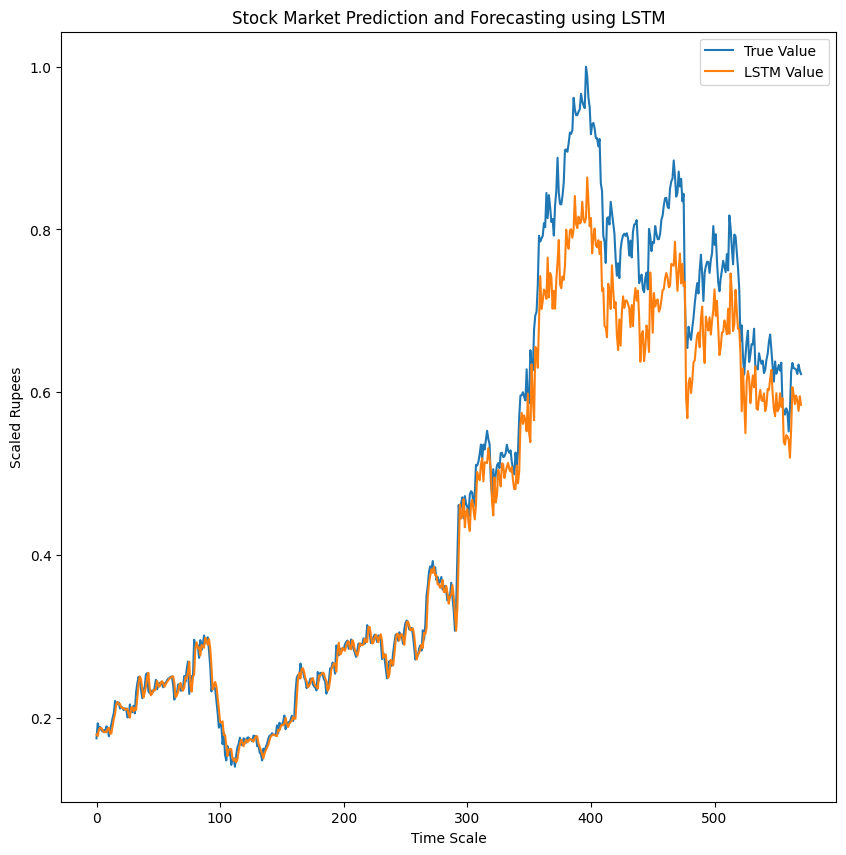

In [141]:

plt.figure(figsize=(10,10))
plt.plot(y_test, label="True Value")
plt.plot(predictions, label="LSTM Value")
plt.title("Stock Market Prediction and Forecasting using LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled Rupees")
plt.legend()
plt.show()
